In [57]:
import pandas as pd
import csv

samsung_path = '005930_삼성전자.csv'
woori_financial_path = '316140_우리금융지주.csv'

samsung = pd.read_csv(samsung_path)
woori = pd.read_csv(woori_financial_path)

df_samsung = pd.DataFrame(samsung)
df_woori = pd.DataFrame(woori)

print(df_samsung)
print(df_woori)

      code  name      date   open   high    low  close    volume  diffratio  \
0     5930  삼성전자  20150102  26800  26800  26540  26600   8774950   0.002261   
1     5930  삼성전자  20150105  26720  26720  26260  26660  10139500   0.002256   
2     5930  삼성전자  20150106  26300  26340  25760  25900  15235500  -0.028507   
3     5930  삼성전자  20150107  25880  26220  25640  26140  14322750   0.009266   
4     5930  삼성전자  20150108  26780  26780  26200  26280  14477600   0.005356   
...    ...   ...       ...    ...    ...    ...    ...       ...        ...   
2207  5930  삼성전자  20231221  74600  75000  74300  75000  13478766   0.002674   
2208  5930  삼성전자  20231222  75800  76300  75400  75900  14515608   0.012000   
2209  5930  삼성전자  20231226  76100  76700  75700  76600  13164909   0.009223   
2210  5930  삼성전자  20231227  76700  78000  76500  78000  20651042   0.018277   
2211  5930  삼성전자  20231228  77700  78500  77500  78500  17797536   0.006410   

      high_close_ratio  ...     ma20         macd  

In [58]:
# 2019-02-13 이후의 데이터만 필터링

# format date type
df_samsung['date'] = df_samsung['date'].astype('str')
df_samsung['date'] = pd.to_datetime(df_samsung['date'])
df_woori['date'] = df_woori['date'].astype('str')
df_woori['date'] = pd.to_datetime(df_woori['date'])

df_samsung = df_samsung[df_samsung['date'] > '2019-02-13']
df_samsung

,code,name,date,open,high,low,close,volume,diffratio,high_close_ratio,...,ma20,macd,macd_signal,minus_dmi,plus_dmi,rsi_signal,ubb,macd_signal_ratio,trans_price_mean,macd_signal_sign
1009,5930,삼성전자,2019-02-14,46600,47500,46150,47500,17259341,0.028139,0.000000,...,44335.0,1536.295126,1381.954166,0.163224,0.452579,67.857143,48367.512603,0.111683,0.088855,NaN
1010,5930,삼성전자,2019-02-15,46750,46850,45650,46050,10554643,-0.030526,0.017372,...,44582.5,1470.624964,1399.688326,0.185259,0.359416,47.154472,48379.767023,0.050680,0.088855,NaN
1011,5930,삼성전자,2019-02-18,46500,46850,45850,46200,8183728,0.003257,0.014069,...,44820.0,1414.380536,1402.626768,0.164180,0.318522,50.413223,48379.035943,0.008380,0.088855,NaN
1012,5930,삼성전자,2019-02-19,45850,46150,45450,45950,6741395,-0.005411,0.004353,...,45020.0,1334.253072,1388.952029,0.197270,0.289970,46.721311,48341.603925,-0.039381,0.088855,NaN
1013,5930,삼성전자,2019-02-20,46750,47100,46500,46900,11506720,0.020675,0.004264,...,45250.0,1332.053457,1377.572314,0.170268,0.363355,55.072464,48411.778314,-0.033043,0.088855,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,5930,삼성전자,2023-12-21,74600,75000,74300,75000,13478766,0.002674,0.000000,...,72730.0,835.667626,692.181760,0.131505,0.359215,76.086957,74763.508764,0.207295,0.092304,NaN
2208,5930,삼성전자,2023-12-22,75800,76300,75400,75900,14515608,0.012000,0.005270,...,72940.0,973.336146,748.412637,0.108475,0.471435,78.431373,75356.957635,0.300534,0.092304,NaN
2209,5930,삼성전자,2023-12-26,76100,76700,75700,76600,13164909,0.009223,0.001305,...,73205.0,1125.916057,823.898964,0.093882,0.461825,79.245283,75997.829164,0.366571,0.092331,NaN
2210,5930,삼성전자,2023-12-27,76700,78000,76500,78000,20651042,0.018277,0.000000,...,73470.0,1344.321298,927.983430,0.076151,0.538285,93.333333,76975.844744,0.448648,0.092331,NaN


In [59]:
# rename df column
df_samsung_filter = df_samsung[['date', 'close', 'diffratio']].rename(columns={'close': 'samsung_close', 'diffratio': 'samsung_diffratio'})
df_woori_filter = df_woori[['date', 'close', 'diffratio']].rename(columns={'close': 'woori_close', 'diffratio': 'woori_diffratio'})

# merge two stocks
df = pd.merge(df_samsung_filter, df_woori_filter, on='date', how='left')

df

,date,samsung_close,samsung_diffratio,woori_close,woori_diffratio
0,2019-02-14,47500,0.028139,16000,0.045752
1,2019-02-15,46050,-0.030526,15650,-0.021875
2,2019-02-18,46200,0.003257,15750,0.006390
3,2019-02-19,45950,-0.005411,15550,-0.012698
4,2019-02-20,46900,0.020675,15250,-0.019293
...,...,...,...,...,...
1198,2023-12-21,75000,0.002674,12980,-0.000770
1199,2023-12-22,75900,0.012000,13000,0.001541
1200,2023-12-26,76600,0.009223,13000,0.000000
1201,2023-12-27,78000,0.018277,12890,-0.008462


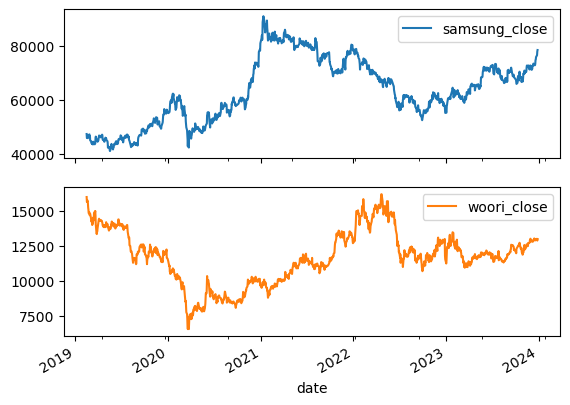

In [60]:
import matplotlib.pyplot as plt

# chart - 가격 비교
df.plot(x='date', y=['samsung_close', 'woori_close'], subplots=True)
plt.savefig('01_price_comparison.png')

In [61]:
# correlation analysis
# 기준을 60으로 잡았는데 값을 조정해도 될 것 같다.

df = df.set_index('date')

corrs = []
turnidxs = []
sign = None
for i in range(len(df) - 60 + 1):
    _df = df[i:60+i]
    corr = _df.corr().loc['samsung_diffratio', 'woori_diffratio']
    if sign is not None:
        if (sign > 0 and corr < 0) or (sign < 0 and corr >= 0):
            turnidxs.append(i + 60 - 1)
    sign = 1 if corr >= 0 else -1
    corrs.append(corr)
corrs

[0.2756984526549779,
 0.19670044381970178,
 0.15680043585266593,
 0.15376356175604652,
 0.1537124976516865,
 0.1981410998312773,
 0.21364058179707518,
 0.2317489965915481,
 0.2245704855618922,
 0.1631324921087992,
 0.1618627970547835,
 0.1708161936577957,
 0.17708655756687214,
 0.17689815803756206,
 0.17983702545585553,
 0.2011128640402346,
 0.18260188365302107,
 0.16907776580074677,
 0.13682203881789506,
 0.16325479610058694,
 0.16406002269871137,
 0.1457576664409965,
 0.15089642542844472,
 0.1504812947621656,
 0.1453326658939527,
 0.2475817818298838,
 0.37409309762423826,
 0.31795372115353376,
 0.2832431823252473,
 0.28124572519234725,
 0.2840273609802987,
 0.2968475528003388,
 0.29706122489809494,
 0.2823983488262105,
 0.26733178394965235,
 0.2600118787086518,
 0.2758435688260322,
 0.2826649403635759,
 0.27844874005507386,
 0.3082519331300154,
 0.28544228610398925,
 0.2869902194255891,
 0.306862896598331,
 0.31018182510618547,
 0.3076165594209502,
 0.2910325540694902,
 0.29822571755

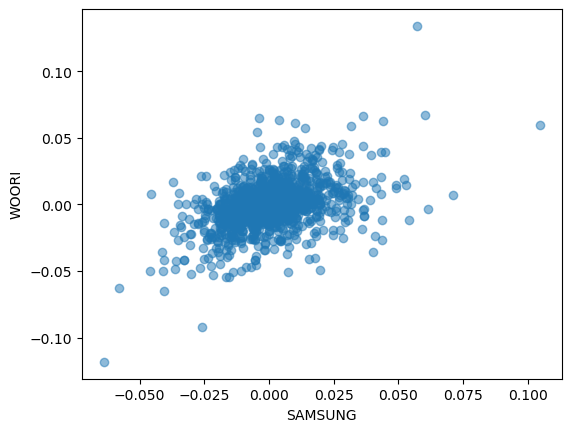

In [62]:
# 등락률 비교

X = df['samsung_diffratio'].values
Y = df['woori_diffratio'].values

import matplotlib.pyplot as plt
plt.scatter(X, Y, alpha=0.5)
plt.xlabel('SAMSUNG')
plt.ylabel('WOORI')
plt.subplots_adjust(left=0.15)
plt.savefig("02_fluctuation_rate_comparison.png")

In [63]:
# df에 corrs 넣기
df.loc[df.iloc[60-1:].index, 'corr'] = corrs
df

,samsung_close,samsung_diffratio,woori_close,woori_diffratio,corr
date,,,,,
2019-02-14,47500,0.028139,16000,0.045752,NaN
2019-02-15,46050,-0.030526,15650,-0.021875,NaN
2019-02-18,46200,0.003257,15750,0.006390,NaN
2019-02-19,45950,-0.005411,15550,-0.012698,NaN
2019-02-20,46900,0.020675,15250,-0.019293,NaN
...,...,...,...,...,...
2023-12-21,75000,0.002674,12980,-0.000770,0.365787
2023-12-22,75900,0.012000,13000,0.001541,0.365154
2023-12-26,76600,0.009223,13000,0.000000,0.374909


In [64]:
# 'date' 열을 datetime 형식으로 변환
df = df.reset_index()

df['date'] = pd.to_datetime(df['date'])

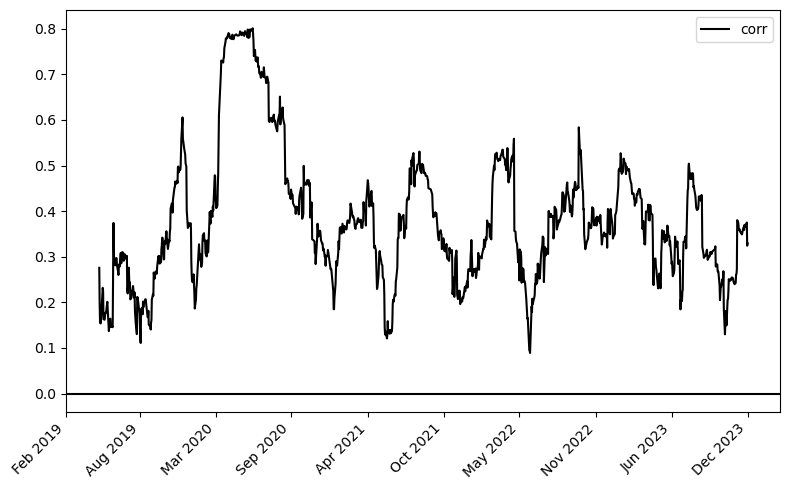

In [65]:
# correlation chart

import numpy as np
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(8, 5))

# for i in df[df['corr'] >= 0.5].index:
#     df.loc[max(0, i-60+1):i+1, 'pos'] = 1

# corr만 그래프로 나타내기
ax.plot(df['date'], df['corr'], color='k', label='corr')
ax.legend()
ax.axhline(0, color='k')

# x축 날짜 포맷 설정
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# x축 틱 설정
xticks = np.linspace(0, len(df)-1, 10, endpoint=True, dtype=int).tolist()
ax.set_xticks(df['date'].iloc[xticks])  # x축 틱을 'date' 열로 설정

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("03_correlation.png")

In [66]:
count_greater_than_half = (df['corr'] > 0.5).sum()  # 0.5보다 큰 값의 개수
total_count = df['corr'].count()  # 총 값의 개수

ratio = count_greater_than_half / total_count

print(f"{'corr'} 열에서 0.5보다 큰 값의 비율: {ratio:.2f}")

mean_value = df['corr'].mean()
print(f"{'corr'} 열의 평균: {mean_value:.2f}")

corr 열에서 0.5보다 큰 값의 비율: 0.16
corr 열의 평균: 0.38


In [67]:
# 참고: 기간을 다르게 해서 분석한 결과
# chart 03에서 Apr 2017 이후 확 높아지는 결과가 보여 해당 기간의 상관관계만 분석

# # 2017-06-01 이후의 데이터만 필터링
# filtered_df = df[df['date'] > '2017-05-01']

# # 0.5보다 큰 값의 개수 계산
# count_greater_than_half = (filtered_df['corr'] > 0.5).sum()  # 0.5보다 큰 값의 개수
# total_count = filtered_df['corr'].count()  # 총 값의 개수

# # 비율 계산
# if total_count > 0:
#     ratio = count_greater_than_half / total_count
# else:
#     ratio = 0  # 값이 없을 경우 비율을 0으로 설정

# print(f"'2017-05-01' 이후 기간에서")
# print(f"{'corr'} 열에서 0.5보다 큰 값의 비율: {ratio:.2f}")

# # 평균 계산
# mean_value = filtered_df['corr'].mean()
# print(f"{'corr'} 열의 평균: {mean_value:.2f}")

In [68]:
# 데이터프레임을 CSV 파일로 저장

df_samsung['Correlation'] = df['corr']
df_woori['Correlation'] = df['corr']
# df_samsung = df_samsung.drop(['code', 'name'], axis=1)
# df_woori = df_woori.drop(['code', 'name'], axis=1)

df_samsung.to_csv('005930_삼성전자_ver2.csv', encoding='utf-8-sig')
df_woori.to_csv('316140_우리금융지주_ver2.csv', encoding='utf-8-sig')

# 생성된 데이터 rltrader에 넣기

In [69]:
df_ss = df_samsung
df_ss['Correlation'] = df['corr']
df_ss

,code,name,date,open,high,low,close,volume,diffratio,high_close_ratio,...,macd,macd_signal,minus_dmi,plus_dmi,rsi_signal,ubb,macd_signal_ratio,trans_price_mean,macd_signal_sign,Correlation
1009,5930,삼성전자,2019-02-14,46600,47500,46150,47500,17259341,0.028139,0.000000,...,1536.295126,1381.954166,0.163224,0.452579,67.857143,48367.512603,0.111683,0.088855,NaN,0.442313
1010,5930,삼성전자,2019-02-15,46750,46850,45650,46050,10554643,-0.030526,0.017372,...,1470.624964,1399.688326,0.185259,0.359416,47.154472,48379.767023,0.050680,0.088855,NaN,0.448701
1011,5930,삼성전자,2019-02-18,46500,46850,45850,46200,8183728,0.003257,0.014069,...,1414.380536,1402.626768,0.164180,0.318522,50.413223,48379.035943,0.008380,0.088855,NaN,0.446761
1012,5930,삼성전자,2019-02-19,45850,46150,45450,45950,6741395,-0.005411,0.004353,...,1334.253072,1388.952029,0.197270,0.289970,46.721311,48341.603925,-0.039381,0.088855,NaN,0.447498
1013,5930,삼성전자,2019-02-20,46750,47100,46500,46900,11506720,0.020675,0.004264,...,1332.053457,1377.572314,0.170268,0.363355,55.072464,48411.778314,-0.033043,0.088855,NaN,0.436956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,5930,삼성전자,2023-12-21,74600,75000,74300,75000,13478766,0.002674,0.000000,...,835.667626,692.181760,0.131505,0.359215,76.086957,74763.508764,0.207295,0.092304,NaN,NaN
2208,5930,삼성전자,2023-12-22,75800,76300,75400,75900,14515608,0.012000,0.005270,...,973.336146,748.412637,0.108475,0.471435,78.431373,75356.957635,0.300534,0.092304,NaN,NaN
2209,5930,삼성전자,2023-12-26,76100,76700,75700,76600,13164909,0.009223,0.001305,...,1125.916057,823.898964,0.093882,0.461825,79.245283,75997.829164,0.366571,0.092331,NaN,NaN
2210,5930,삼성전자,2023-12-27,76700,78000,76500,78000,20651042,0.018277,0.000000,...,1344.321298,927.983430,0.076151,0.538285,93.333333,76975.844744,0.448648,0.092331,NaN,NaN
